In [114]:
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

[0.1950282  0.16199015 0.13393375 0.12659261 0.08040703 0.07304033
 0.07129663 0.06336687]
[0.06219012 0.08324263 0.12001232 0.13670909 0.19099056 0.37265475
 0.48833311 1.76019079]
1
x[i]:36.970000 mod:-2.521948 sigma =: 1.266667)
[0.10301385]


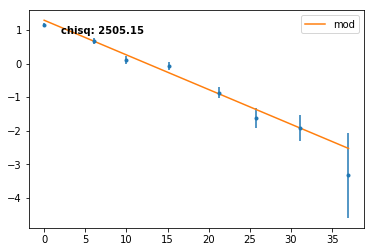

In [120]:
x = np.array([0, 6.0, 10.0, 15.2, 21.2, 25.7, 31.12, 36.97])
I = np.array([3.62, 2.43, 1.60, 1.41, 0.905, 0.68, 0.63, 0.52])
lnI = np.log(I - bg)
bg = 0.484
I0 = 3.62

#uncertainty for measured count rate. =sqrt(N/t^2)
sigma = np.array([.190, .1559, .1265, .1187, .0673, .0583, .0561, .0456])
#uncert for background count rate =sqrt(N/t^2)
sigb = .044


#total uncert for I - bg
def sigI(sigma, sigb):
    return((sigma**2 + sigb**2)**.5)
sigI = sigI(sigma, sigb)
print(sigI)

#uncert for ln(I - bg)
def sigf(I, bg, sigI):
    return((1/(I - bg))*(sigI))
print(sigf(I, bg, sigI))
sigf = sigf(I, bg, sigma)

plt.errorbar(x, lnI, sigf, fmt='.')



def mod(x, mu):
    I0 = 3.62
    return(np.log(I0) - mu*x)
init_guess = [.01]
fit = scipy.optimize.curve_fit(mod, x, lnI, sigma = sigf, p0 = init_guess, absolute_sigma = True)
ans, cov = fit
print(len(ans))
fit_mu1 = ans

z = np.linspace(0, 37)
plt.plot(z, mod(z, fit_mu1), label = 'mod')
plt.legend()

chisq = np.sum(((I - mod(x, fit_mu1)))**2/(sigf)**2)
print('x[i]:%f mod:%f sigma =: %f)'%(x[i],mod(x[i], fit_mu1),(sigf[i])))
plt.figtext(0.2, 0.8, "chisq: %.2f"%chisq,fontweight='bold')
chisqr = chisq/6
print(chi)

print(fit_mu1)
plt.legend()

x[i]:36.970000 model:0.517369 sigma =: 0.045600)
3.259601210452137 0.08718765479662878 0.3875642696911868


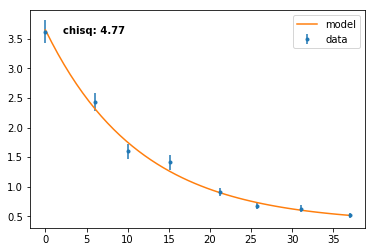

In [122]:

x = np.array([0, 6.0, 10.0, 15.2, 21.2, 25.7, 31.12, 36.97])
I = np.array([3.62, 2.43, 1.60, 1.41, 0.905, 0.68, 0.63, 0.52])
lnI = np.log(I - bg)
bg = 0.484

#uncertainty for measured count rate. =sqrt(N/t^2)
sigma = np.array([.190, .1559, .1265, .1187, .0673, .0583, .0561, .0456])
#uncert for background count rate =sqrt(N/t^2)
sigb = .044




#def model1(x, I0, mu):
#    return(np.log(I0) - mu*x)
#init_guess = [1,1,1]
#fit = scipy.optimize.curve_fit(model, x, lnI, sigma = sigma1, p0 = init_guess, absolute_sigma = True)
#ans, cov = fit
#fit_I01, fit_mu1 = ans




def model(x, I0, mu, c):
    return(I0*np.exp(-mu*x) + c)
init_guess = [1, .01, .1]

fit = scipy.optimize.curve_fit(model, x, I, sigma = sigma, p0 = init_guess, absolute_sigma = True)
ans, cov = fit
fit_I0, fit_mu, fit_c = ans

#Plot of data points
plt.errorbar(x, I, sigma, fmt = '.', label = 'data')

# Plot of exponential decal model w/ background term
t = np.linspace(0, 37)
plt.plot(t, model(t, fit_I0, fit_mu, fit_c), label = 'model')
plt.legend()

chisq = np.sum(((I - model(x, fit_I0, fit_mu, fit_c)))**2/(sigma)**2)
print('x[i]:%f model:%f sigma =: %f)'%(x[i],model(x[i], fit_I0, fit_mu, fit_c),(sigma[i])))
plt.figtext(0.2, 0.8, "chisq: %.2f"%chisq,fontweight='bold')
print(fit_I0, fit_mu, fit_c)
plt.legend()

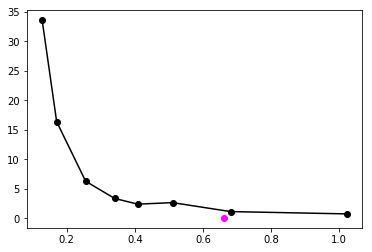

In [59]:
photon = np.array([.1277, .1703, .2554, .3405, .4086, .5108, .6811, 1.022])
u = np.array([33.6, 16.4, 6.31, 3.39, 2.42, 2.68, 1.16, .771])
#sigma = np.array([1822, 1023, 500, 192, 103.3, 73.5, 51.2, 35.2, 23.45, 18.87, 15.19, 14.28, 14.93, 18.47, 21.25, 25.41])
u_ex = 0.087
plt.plot(photon, u, 'o-', color = 'black')
plt.plot(0.662, 0.087, 'o', color = 'magenta')